# Model Deployement

This Notebook preapre and deploy a docker image in AWS.

## Model
The model is a simple linear regression based on fake data abour salary.
Source comes from mockaroo.com

#
Prepare and train a model for a docker installation

In [17]:
# import some libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, date

In [18]:
# load the dataset
data = pd.read_csv('data/salary.csv')
data.shape

(1000, 8)

In [19]:
data.sample(4)

,id,title,first_name,last_name,birthdate,level_school,graduated,salary
377,378,Mrs,Corliss,Jonk,9/25/1989,3,False,12633.12
372,373,Honorable,Emalee,Tarney,1/10/1968,2,True,20861.50
721,722,Dr,Stacey,Huerta,8/25/1977,6,True,13105.40
370,371,Honorable,Ilise,Fysh,1/13/1983,4,True,21320.20


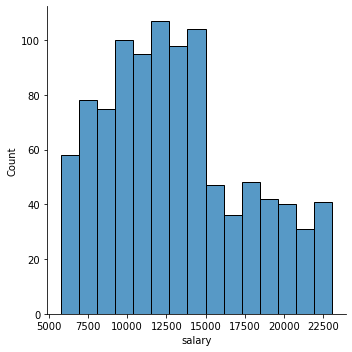

In [20]:
# plot a distribution of salary, target variable
sns.displot(data, x="salary")

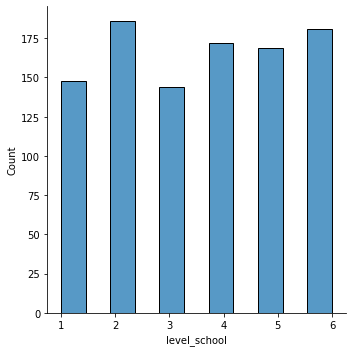

In [21]:
# check distribution of level_school
# plot a distribution of salary, target variable
sns.displot(data, x="level_school")

In [23]:
# compute age
#data['birthdate'] = pd.to_datetime(data['birthdate'])
def age(born):
    born = datetime.strptime(born, "%m/%d/%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
  
data['age'] = data['birthdate'].apply(age)
data.sample(5)

,id,title,first_name,last_name,birthdate,level_school,graduated,salary,age
875,876,Mr,Krissy,Hughlock,12/2/1969,4,True,14954.5,52
13,14,Ms,Petunia,Howselee,8/27/1961,2,True,19500.8,60
824,825,Mr,Montague,Ivanonko,10/19/1984,3,True,10439.0,37
60,61,Mrs,Manda,Zappel,1/20/1990,6,True,9786.7,31
64,65,Honorable,Laurel,Dowman,9/13/1986,1,True,15426.4,35


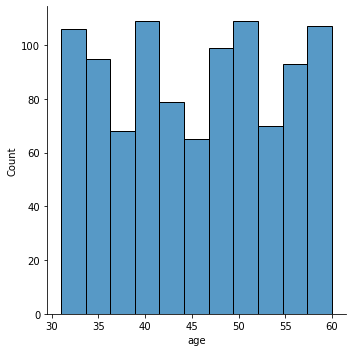

In [24]:
# check distribution of level_school
# plot a distribution of salary, target variable
sns.displot(data, x="age")

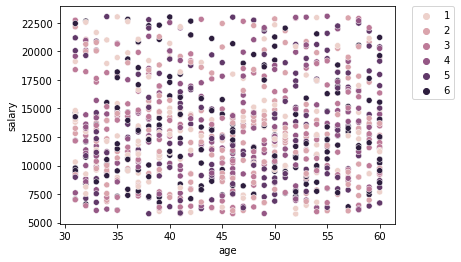

In [27]:
sns.scatterplot(data=data, x="age", y="salary", hue="level_school")
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)